# Import All Important Libraries required in This Notebook

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load Data 

In [2]:
#Load data
data_url='http://bit.ly/w-data'
data=pd.read_csv(data_url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [24]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [26]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [27]:
data.isna

<bound method DataFrame.isna of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

# Change Data into Labels and Feature

In [124]:
#change data into label and features
X=data.iloc[:,:-1].values
Y=data.iloc[:, 1].values

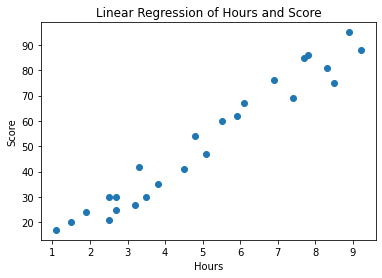

In [125]:
#Plot The Data into Graph to show the Linearity of data
plt.title("Linear Regression of Hours and Score")
plt.scatter(X,Y)
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

This Data is Like A linear Regression

# Split Data into Train and Test 

In [126]:
#Split Data into Train test using Sklearn libraries
x_train,x_test,y_train,y_test=train_test_split(X,Y,shuffle=True,test_size=0.2,random_state=True)

In [127]:
print(x_train.shape,x_test.shape,len(x_train))
print(y_train.shape,y_test.shape,len(y_test))


(20, 1) (5, 1) 20
(20,) (5,) 5


# Model Training 

In [128]:
#Train the Model
regression_model=LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression()

In [129]:
#Regression Line
regression_line=regression_model.coef_*X+regression_model.intercept_
regression_line

array([[24.6158134 ],
       [51.81469497],
       [31.93858921],
       [87.38246316],
       [35.0769217 ],
       [14.15470511],
       [94.70523897],
       [55.99913828],
       [85.29024151],
       [26.70803506],
       [79.01357653],
       [60.1835816 ],
       [45.53802999],
       [32.98470004],
       [ 9.97026179],
       [91.56690648],
       [24.6158134 ],
       [18.33914843],
       [62.27580326],
       [75.87524404],
       [26.70803506],
       [48.67636248],
       [38.21525418],
       [70.64468989],
       [80.05968736]])

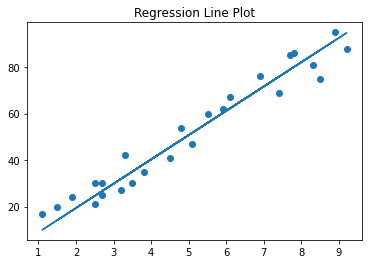

In [130]:
#Regression Line plot 
plt.title("Regression Line Plot")
plt.scatter(X,Y)
plt.plot(X,regression_line)
plt.show()

# Prediction

In [131]:
#Prediction
y_pred=regression_model.predict(x_test)
y_pred

array([ 9.97026179, 32.98470004, 18.33914843, 87.38246316, 48.67636248])

In [132]:
new_data=pd.DataFrame({"Acutal":y_test,"Predicted":y_pred})
new_data

,Acutal,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


# Prediction in New Data

In [138]:
#Prediction in New Data
new_dat=pd.DataFrame({"Hours":[9.25]})
new_pred=regression_model.predict(new_dat)
print("No of Hours = {}".format(new_dat.iloc[0].values))
print("Predicted Score = {}".format(new_pred[0]))

No of Hours = [9.25]
Predicted Score = 95.22829438402952


# Evaluate The Model

In [134]:
#Evaluate the Model
metrics.mean_absolute_error(y_test,y_pred)

7.882398086270432